# Learning From Data Homework 8

## 1 Primal versus Dual Problem

The primal formulation of the hard-margin SVM problem is a quadratic programming problem where we find minimize with respect to (d+1) variables, which is $$ \mathbf w, b $$, and subject to N inequality constraints.

## 2 SVM with Soft Margins

In [2]:
import numpy as np

data_train = np.loadtxt("features.train")
print("data_train.shape", data_train.shape)

data_test = np.loadtxt("features.test")
print("data_test.shape", data_test.shape)

data_train.shape (7291, 3)
data_test.shape (2007, 3)


In [4]:
data_train[0:10,:]

array([[ 6.        ,  0.3410918 , -4.5289375 ],
       [ 5.        ,  0.44413086, -5.4968125 ],
       [ 4.        ,  0.23100195, -2.88675   ],
       [ 7.        ,  0.20027539, -3.534375  ],
       [ 3.        ,  0.29193555, -4.3520625 ],
       [ 6.        ,  0.21278516, -3.721375  ],
       [ 3.        ,  0.20337891, -3.3363125 ],
       [ 1.        ,  0.12304297, -0.707875  ],
       [ 0.        ,  0.28954102, -4.644125  ],
       [ 1.        ,  0.11385937, -0.931375  ]])

/Users/wu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

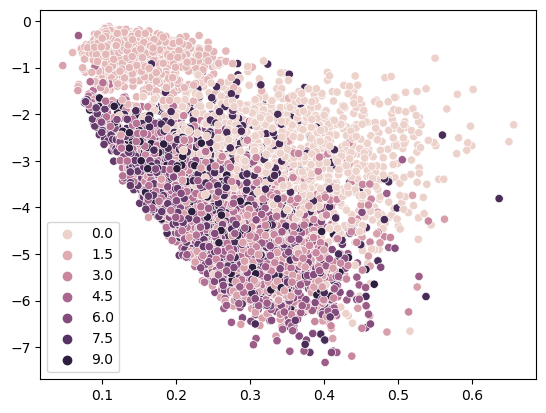

In [8]:
import seaborn as sb

sb.scatterplot( data_train[:,1], data_train[:,2], data_train[:,0] )

In [10]:
get_pos = lambda n: divmod(n, 3)
get_pos(6)

(2, 0)

use matplotlib

In [11]:
import matplotlib.pyplot as plt

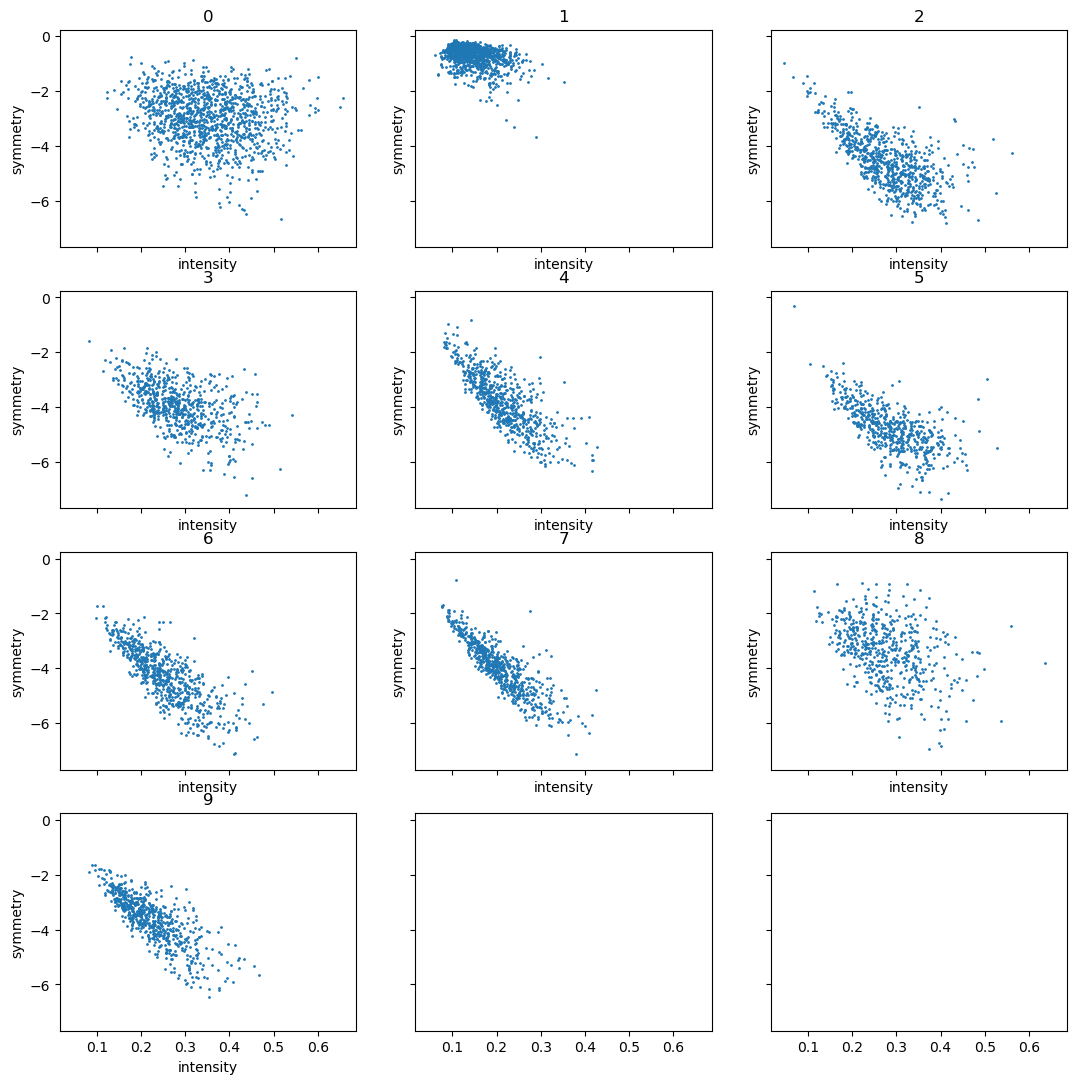

In [12]:
get_pos = lambda n: divmod(n, 3)
fig, ax = plt.subplots(4, 3, figsize=(13,13), sharex=True, sharey=True)

for n in range(10):
    i = np.where(data_train[:,0] == n)
    ax[get_pos(n)].scatter(data_train[i,1], data_train[i,2], s=1)
    ax[get_pos(n)].set_title(n)
    ax[get_pos(n)].set_xlabel("intensity")
    ax[get_pos(n)].set_ylabel("symmetry")

plt.show()

## Polynomial Kernels

$$K(\mathbf x_n, \mathbf x_m) = (1 + \mathbf x_n^T \mathbf x_m)^Q$$

In [18]:
def get_n_vs_all_dataset(n, which="train"):
    if which == "train":
        data = data_train
    else :
        data = data_test
        
    is_n = data[:,0] == n
    is_not_n = data[:,0] != 0
    X = data.copy()
    X[:,0] = 1.0
    y = 2*is_n - 1
    return X, y

In [23]:
from sklearn import svm

for n in (0, 2, 4, 6, 8):
    clf = svm.SVC(C=0.01, kernel='poly', degree= 2, gamma=1, coef0=1.0)
    X, y = get_n_vs_all_dataset(n)
    clf.fit(X, y)
    y_predict = clf.predict(X)
    E_in = np.mean(y != y_predict)
    print(n, E_in)

0 0.10245508160746125
2 0.10026059525442327
4 0.08942531888629818
6 0.09107118365107666
8 0.07433822520916199


0 vs all has the highest $$ E_{in} = 0.102 $$ 


In [24]:
for n in (1, 3, 5, 7, 9):
    clf = svm.SVC(C=0.01, kernel='poly', degree= 2, gamma=1, coef0=1.0)
    X, y = get_n_vs_all_dataset(n)
    clf.fit(X, y)
    y_predict = clf.predict(X)
    E_in = np.mean(y != y_predict)
    print(n, E_in)

1 0.014401316691811822
3 0.09024825126868742
5 0.07625840076807022
7 0.08846523110684405
9 0.08832807570977919


1 vs all has the lowest $$ E_{in} = 0.01 $$ 

In [25]:
clf = svm.SVC(C=0.01, kernel="poly", degree=2, gamma=1.0)
X, y = get_n_vs_all_dataset(0)
clf.fit(X, y)
a_num = len(clf.support_)
print("0 vs all support vecs:", a_num)

clf = svm.SVC(C=0.01, kernel="poly", degree=2, gamma=1.0)
X, y = get_n_vs_all_dataset(1)
clf.fit(X, y)
b_num = len(clf.support_)
print("1 vs all support vecs:", b_num)

print("difference:", a_num - b_num)

0 vs all support vecs: 2179
1 vs all support vecs: 386
difference: 1793


The difference is 1793, near 1800.

In [51]:
def get_n_vs_m_dataset(n, m, which="train"):
    if which == "train":
        data = data_train
    else: 
        data = data_test
    
    is_n = data[:, 0] ==n
    is_m = data[:, 0] == m
    relevant_data = data[np.logical_or(is_n, is_m)]
    X = relevant_data.copy()
    X[:,0] = 1.0
    y = relevant_data[:,0].copy()
    
    y[np.where(relevant_data[:,0] == n)] = 1
    y[np.where(relevant_data[:,0] == m)] = -1
    return  X, y

In [52]:
X_train, y_train = get_n_vs_m_dataset(1, 5, "train")
X_test, y_test = get_n_vs_m_dataset(1, 5, "test")

for C in (0.001, 0.01, 0.1, 1):
    clf = svm.SVC(C=C, kernel="poly", degree=2, gamma=1.0, coef0=1.0)
    clf.fit(X_train, y_train)
    nvecs = len(clf.support_)
    E_in = np.mean(clf.predict(X_train) != y_train)
    E_out = np.mean(clf.predict(X_test) != y_test)

    print("C={}, supportvecs={}, Ein={}, Eout={}".format(C, nvecs, E_in, E_out))

C=0.001, supportvecs=74, Ein=0.004484304932735426, Eout=0.01650943396226415
C=0.01, supportvecs=34, Ein=0.004484304932735426, Eout=0.018867924528301886
C=0.1, supportvecs=24, Ein=0.004484304932735426, Eout=0.018867924528301886
C=1, supportvecs=24, Ein=0.0032030749519538757, Eout=0.018867924528301886


The answer is d, Maximum C achieves the lowest Ein, but I think a is also right, when C goes smaller (stricter), number of support vectors goes up.

In [54]:
X_train, y_train = get_n_vs_m_dataset(1, 5, "train")
X_test, y_test = get_n_vs_m_dataset(1, 5, "test")
for C in (0.0001, 0.001, 0.010, 0.1):
    clf2 = svm.SVC(C=C, kernel="poly", degree=2, gamma=1.0)
    clf2.fit(X_train, y_train)
    nvecs2 = len(clf2.support_)
    E_in2 = np.mean(clf2.predict(X_train) != y_train)
    E_out2 = np.mean(clf2.predict(X_test) != y_test)
    clf5 = svm.SVC(C=C, kernel="poly", degree=5, gamma=1.0)
    clf5.fit(X_train, y_train)
    nvecs5 = len(clf5.support_)
    E_in5 = np.mean(clf5.predict(X_train) != y_train)
    E_out5 = np.mean(clf5.predict(X_test) != y_test)

    print("C={}, vecs2={}, vecs5={}, Ein2={:f}, Ein5={:f}, Eout2={:f}, Eout5={:f}".format
          (C, nvecs2, nvecs5, E_in2, E_in5, E_out2, E_out5))
    

C=0.0001, vecs2=236, vecs5=26, Ein2=0.008969, Ein5=0.004484, Eout2=0.016509, Eout5=0.018868
C=0.001, vecs2=76, vecs5=25, Ein2=0.004484, Ein5=0.004484, Eout2=0.016509, Eout5=0.021226
C=0.01, vecs2=34, vecs5=23, Ein2=0.004484, Ein5=0.003844, Eout2=0.018868, Eout5=0.021226
C=0.1, vecs2=24, vecs5=25, Ein2=0.004484, Ein5=0.003203, Eout2=0.018868, Eout5=0.018868


When Q = 5, model has smaller number of support vectors and Ein, but higher Eout. 

## Cross Validation

In [55]:
from collections import defaultdict

In [62]:
X, y = get_n_vs_m_dataset(1, 5)

def argmin(d):
    m = 999
    arg = 0
    for C in (0.0001, 0.001, 0.01, 0.1, 1):
        if d[C] < m:
            m = d[C]
            arg = C
    return arg

In [63]:
selected = defaultdict(int)
all_E_cvs = []
winning_E_cvs = []

In [64]:
from sklearn import model_selection

In [65]:
for i in range(100):
    kfold = model_selection.KFold(n_splits=10, shuffle=False)
    E_cvs = defaultdict(float)
    for itrain, itest in kfold.split(X):
        for C in (0.0001, 0.001, 0.01, 0.1, 1):
            X_train, y_train = X[itrain,:], y[itrain]
            X_test, y_test = X[itest,:], y[itest]
            clf = svm.SVC(C=C, kernel="poly", degree=2, gamma=1.0, coef0=1.0)
            clf.fit(X_train, y_train)
            E_val = np.mean(clf.predict(X_test) != y_test)
            E_cvs[C] += E_val
    best_C = argmin(E_cvs)
    selected[best_C] += 1
    winning_E_cvs.append(E_cvs[best_C])
    print("iter_num {}".format(i),selected)
    
print("avg winning Ecv over all runs", np.mean(winning_E_cvs))

iter_num 0 defaultdict(<class 'int'>, {0.001: 1})
iter_num 1 defaultdict(<class 'int'>, {0.001: 2})
iter_num 2 defaultdict(<class 'int'>, {0.001: 3})
iter_num 3 defaultdict(<class 'int'>, {0.001: 4})
iter_num 4 defaultdict(<class 'int'>, {0.001: 5})
iter_num 5 defaultdict(<class 'int'>, {0.001: 6})
iter_num 6 defaultdict(<class 'int'>, {0.001: 7})
iter_num 7 defaultdict(<class 'int'>, {0.001: 8})
iter_num 8 defaultdict(<class 'int'>, {0.001: 9})
iter_num 9 defaultdict(<class 'int'>, {0.001: 10})
iter_num 10 defaultdict(<class 'int'>, {0.001: 11})
iter_num 11 defaultdict(<class 'int'>, {0.001: 12})
iter_num 12 defaultdict(<class 'int'>, {0.001: 13})
iter_num 13 defaultdict(<class 'int'>, {0.001: 14})
iter_num 14 defaultdict(<class 'int'>, {0.001: 15})
iter_num 15 defaultdict(<class 'int'>, {0.001: 16})
iter_num 16 defaultdict(<class 'int'>, {0.001: 17})
iter_num 17 defaultdict(<class 'int'>, {0.001: 18})
iter_num 18 defaultdict(<class 'int'>, {0.001: 19})
iter_num 19 defaultdict(<class 

In [66]:
E_cvs

defaultdict(float,
            {0.0001: 0.08962110076759758,
             0.001: 0.04483096521313082,
             0.01: 0.04483096521313082,
             0.1: 0.05124122162338723,
             1: 0.05124122162338723})

So C = 0.001 is the best.

In [67]:
winning_E_cvs

[0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.04483096521313082,
 0.0448309

But I could not find the answer of 8, solution is 0.005, but the result is obviously 10 times bigger.

In [69]:
X_train, y_train = get_n_vs_m_dataset(1, 5, "train")
X_test, y_test = get_n_vs_m_dataset(1, 5, "test")

for C in (0.01, 1, 100, 10000, 1000000):
    clf = svm.SVC(C=C, kernel="rbf", gamma=1.0)
    clf.fit(X_train, y_train)
    E_out = np.mean(clf.predict(X_test) != y_test)
    E_in = np.mean(clf.predict(X_train) != y_train)
    print("C = {}".format(C), "E_in = {}".format(E_in), "E_out = {}".format(E_out))

C = 0.01 E_in = 0.003843689942344651 E_out = 0.02358490566037736
C = 1 E_in = 0.004484304932735426 E_out = 0.02122641509433962
C = 100 E_in = 0.0032030749519538757 E_out = 0.018867924528301886
C = 10000 E_in = 0.0025624599615631004 E_out = 0.02358490566037736
C = 1000000 E_in = 0.0006406149903907751 E_out = 0.02358490566037736


In general when C goes larger, which means the restriction becomes looser, the Ein is smaller.

But when C = 100, we get the smaller Eout.